In [3]:
from cot_probing import DATA_DIR
import pickle
from pathlib import Path

results = {}
dataset = "strategyqa"
# dataset = "gpt-4o-oct28-1156"
for file in (DATA_DIR / "no-cot-accuracy").glob(f"*_{dataset}.pkl"):
    model_name = file.stem.split("_")[-2]
    with open(file, "rb") as f:
        result = pickle.load(f)
        results[model_name] = list(result.acc_by_qid.values())

print(results.keys())

dict_keys(['gemma-2-2b-it', 'Llama-3.2-3B-Instruct', 'Meta-Llama-3.1-8B-BNB-NF4-BF16', 'Llama-3.1-8B'])


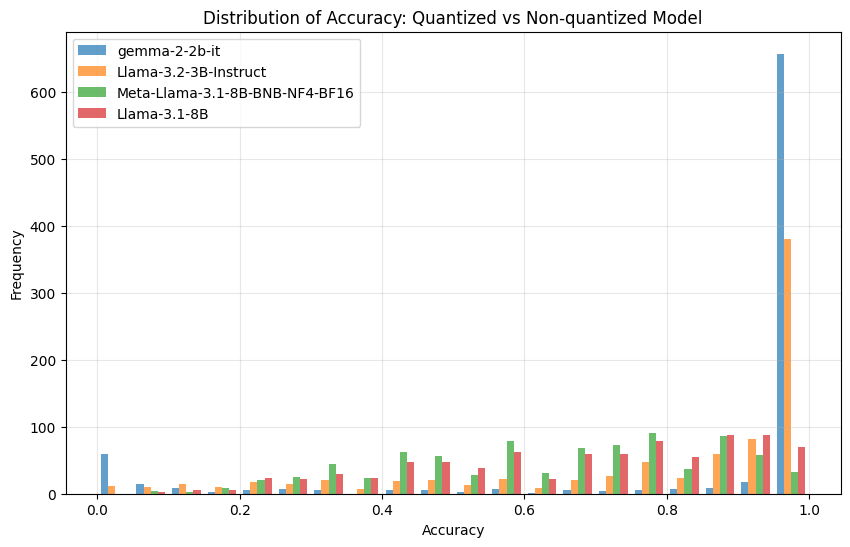

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(
    results.values(),
    label=results.keys(),
    bins=20,
    alpha=0.7,
)
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Distribution of Accuracy: Quantized vs Non-quantized Model")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()